In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# 导入数据并添加列名
data = pd.read_csv("ex2data1.txt", header=None, names=['Exam1', 'Exam2', 'Admitted'])
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]


In [4]:
# sigmoid函数
def sigmoid(z):
    """
    sigmoid函数
    参数:
        z(np.array): 输入

    返回:
        array: 结果
    """
    return 1 / (1 + np.exp(-z))

In [5]:
def cost(theta, X, y):
    """
    代价函数

    参数:
        theta (np.array): 模型参数
        X (np.array): 特征
        y (np.array): 目标

    返回:
        float: 代价值
    """
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X @ theta)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X @ theta)))
    return np.sum(first - second) / (len(X))

In [6]:
def gradientDescent(X, y, theta, alpha, times):
    """
    梯度下降算法优化参数

    参数:
        X (np.array): 特征
        y (np.array): 真实值
        theta (np.array): 参数
        alpha (float): 学习率
        times (int): 迭代次数

    返回:
        np.array: 模型参数
    """
    m = len(X)
    for i in range(times): # 迭代
        A = sigmoid(X @ theta)
        theta = theta - (alpha / m) * X.T @ (A - y)

    fcost = cost(theta, X, y)
    return fcost, theta

In [7]:
def predict(X, theta):
    """
    使用训练好的模型进行预测

    参数:
        X (np.array): 特征
        theta (np.array): 模型参数

    返回:
        list: 预测结果，1表示录取，0表示不录取
    """
    prob = sigmoid(X @ theta)
    return [1 if x >= 0.5 else 0 for x in prob]

In [8]:
data.insert(0, 'Ones', 1) # 加入偏置项

cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]
theta = np.zeros((3, 1)) # 初始化模型参数

X = np.array(X.values)
y = np.array(y.values)

In [9]:
print(f"初始代价：{cost(theta, X, y)}")

初始代价：0.6931471805599453


In [10]:
fcost, theta = gradientDescent(X, y, theta, 0.004, 200000)
print(f"最终代价：{fcost}")
print(f"模型参数：{theta}")

pred = np.array(predict(X, theta))
pred2 = pred.reshape(len(pred), 1)
acc = np.mean(pred2 == y)
print(f"准确率：{acc}")

最终代价：0.2473145774512494
模型参数：[[-23.77314018]
 [  0.18687162]
 [  0.18041411]]
准确率：0.86


In [11]:
# 回归方程
a = -theta[0,0] / theta[2,0]
b = -theta[1,0] / theta[2,0]
x = np.linspace(20, 100, 100)
f = a + b*x

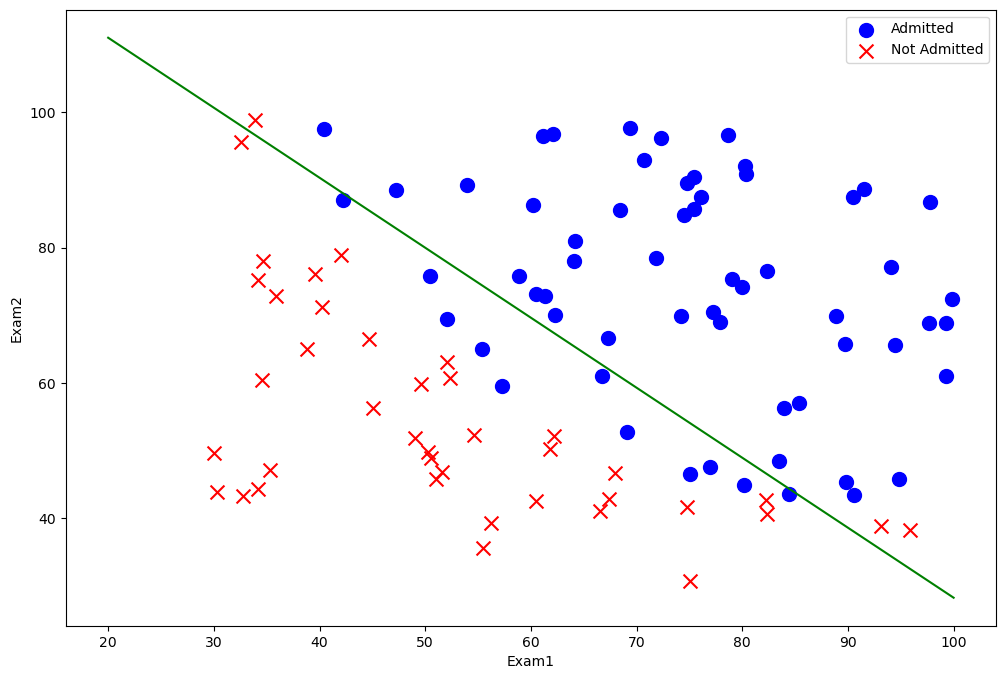

In [12]:
# 可视化逻辑回归
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(positive['Exam1'], positive['Exam2'], s=100, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam1'], negative['Exam2'], s=100, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam1')
ax.set_ylabel('Exam2')
ax.plot(x ,f, c='g')
plt.show()